In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#try:
#    import open_clip
#    from optim_utils import * 
#except ModuleNotFoundError:
    # You only really need this safety net if you want to run these notebooks directly in the examples directory
    # Don't worry about this if you installed the package or moved the notebook to the main directory.
import os; os.chdir("..")
import open_clip
from optim_utils import * 

import torch
import mediapy as media
import argparse

## Load Arguments

In [50]:
args = argparse.Namespace()
args.__dict__.update(read_json("sample_config.json"))

args

Namespace(prompt_len=16, iter=3000, lr=0.001, weight_decay=0.1, prompt_bs=1, loss_weight=1.0, print_step=100, batch_size=2, clip_model='ViT-H-14', clip_pretrain='laion2b_s32b_b79k')

## Load Clip Model

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, preprocess = open_clip.create_model_and_transforms(args.clip_model, pretrained=args.clip_pretrain, device=device)

## Load Diffusion Model

In [5]:
raise ValueError("no")
from diffusers import DPMSolverMultistepScheduler, StableDiffusionPipeline

model_id = "stabilityai/stable-diffusion-2-1-base"
scheduler = DPMSolverMultistepScheduler.from_pretrained(model_id, subfolder="scheduler")

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    scheduler=scheduler,
    torch_dtype=torch.float16,
    revision="fp16",
    )
pipe = pipe.to(device)

image_length = 512

ValueError: no

## Load Target Image


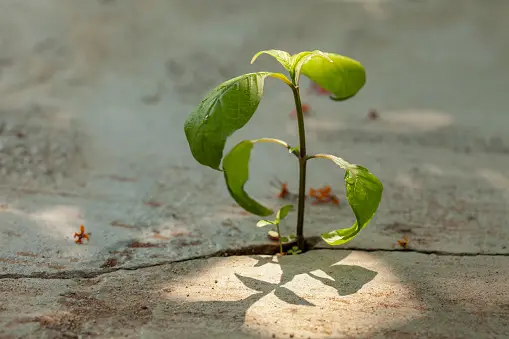
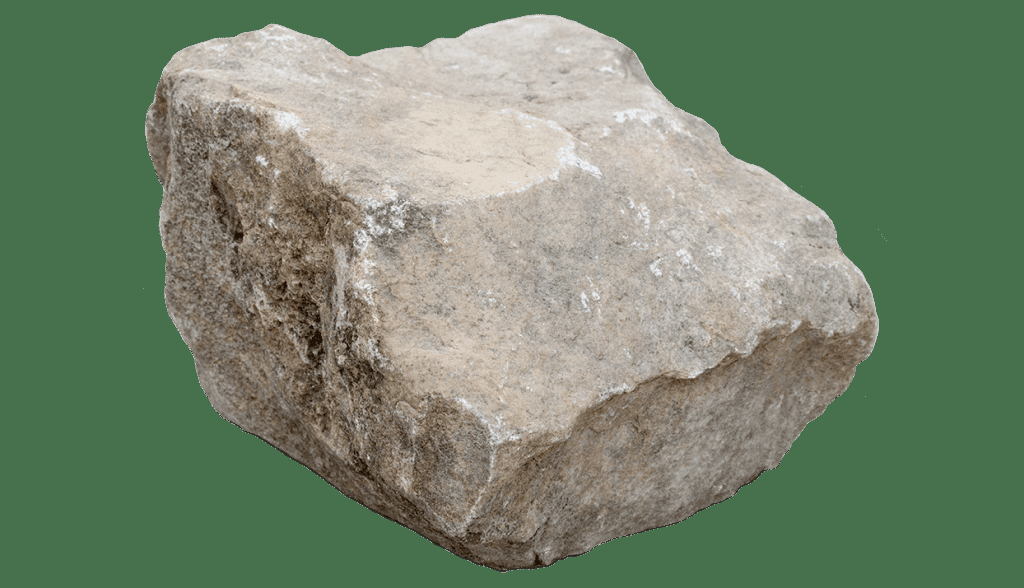

In [31]:
urls = [
        "https://media.istockphoto.com/id/1470130937/photo/young-plants-growing-in-a-crack-on-a-concrete-footpath-conquering-adversity-concept.webp?b=1&s=170667a&w=0&k=20&c=IRaA17rmaWOJkmjU_KD29jZo4E6ZtG0niRpIXQN17fc=",
    "https://i0.wp.com/www.nerdswithknives.com/wp-content/uploads/2018/03/Fieldstone-1024x588.png?ssl=1"
       ]

orig_images = list(filter(None,[download_image(url) for url in urls]))
media.show_images(orig_images)

## Optimize Prompt

In [2]:
args.print_step=100
args.lr = 0.1
args.print_new_best = True
learned_prompt = optimize_prompt(model, preprocess, args, device, 
                                 target_images=orig_images, 
                                 target_prompts=None,
                                 noise_amount=0.01,
                                 target_loss_scales=torch.tensor([1, -0.5]),
                                initial_prompt="* *")

NameError: name 'args' is not defined

## Generate with Stable Diffusion Model

In [7]:
# you can customize the learned prompt here
prompt = "two dogs are running"
negative_prompt = learned_prompt

prompt: two dogs are running
negative prompt: suppliers favorable bbhuttoattractive lawn stade naturally afl canberra 🧡ultimatefanbulaga bluegrass grass leveseeds 


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:06<00:00,  3.68it/s]


without negative prompt:



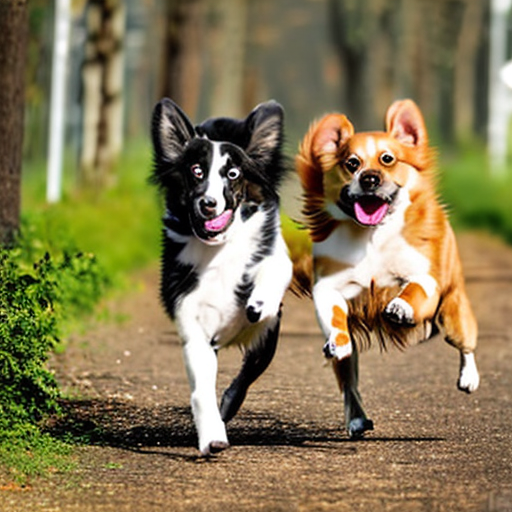
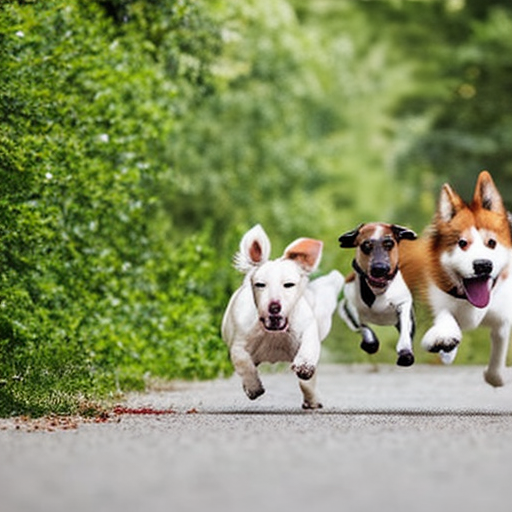
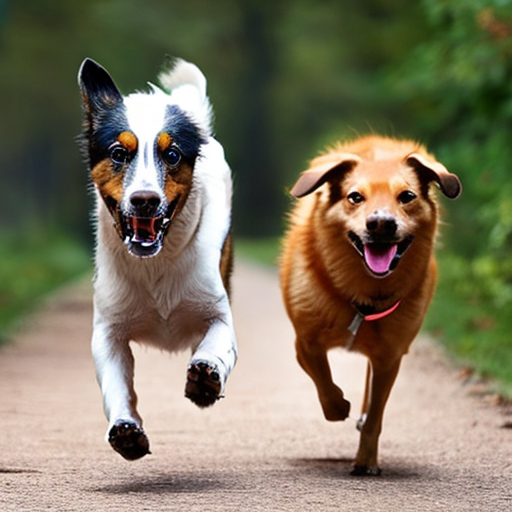
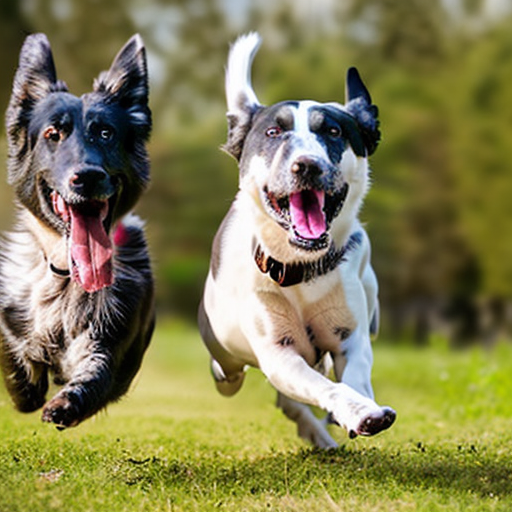

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:06<00:00,  3.69it/s]


with negative prompt:



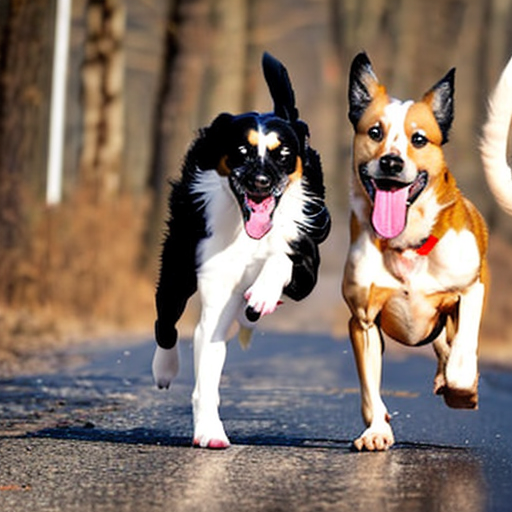
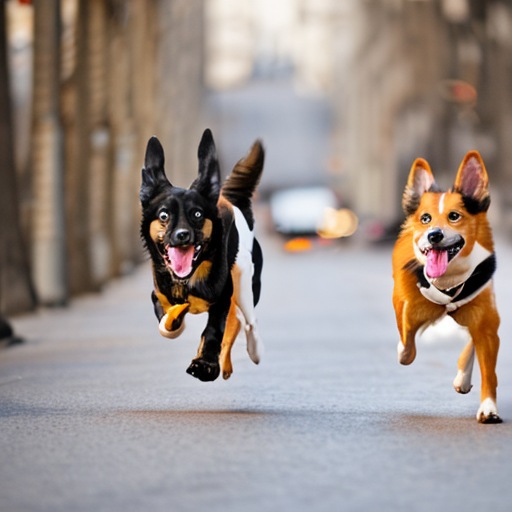
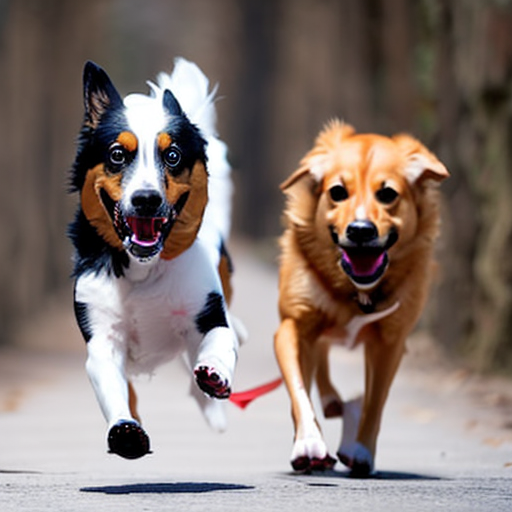
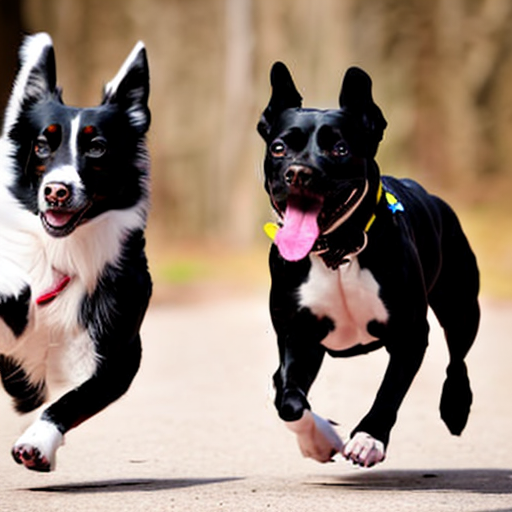

In [8]:
num_images = 4
guidance_scale = 9
num_inference_steps = 25
seed = 0

print(f"prompt: {prompt}")
print(f"negative prompt: {negative_prompt}")

set_random_seed(seed)
images = pipe(
    prompt,
    num_images_per_prompt=num_images,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=image_length,
    width=image_length,
    ).images
print(f"without negative prompt:")
media.show_images(images)

set_random_seed(seed)
images = pipe(
    prompt,
    num_images_per_prompt=num_images,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=image_length,
    width=image_length,
    negative_prompt=negative_prompt,
    ).images

print(f"with negative prompt:")
media.show_images(images)